# Clients segmentation

In this project we will do a customer segmentation using unsupervised machine learning (clustering).
We will create subsets based on the demographics, perform exploratory data analysis to understand our data. Then we will use a k-means clustering algorithm to create our segments.
Our target group is a cluster 1 which has a high spending score and high income. We should find different methods to attract these buyers using a targeting marketing campaign.
Cluster 2 provides opportunities to the customers to buy popular goods. 
The dataset is from Kaggle: https://www.kaggle.com/datasets/shwetabh123/mall-customers. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/alexa/datasets/mall_customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory data analysis

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


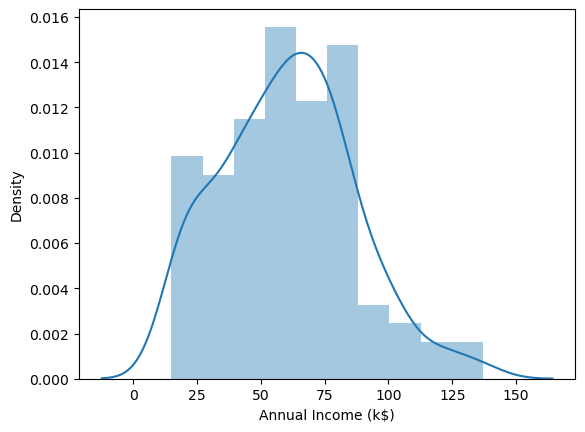

In [11]:
sns.distplot(df['Annual Income (k$)']);

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

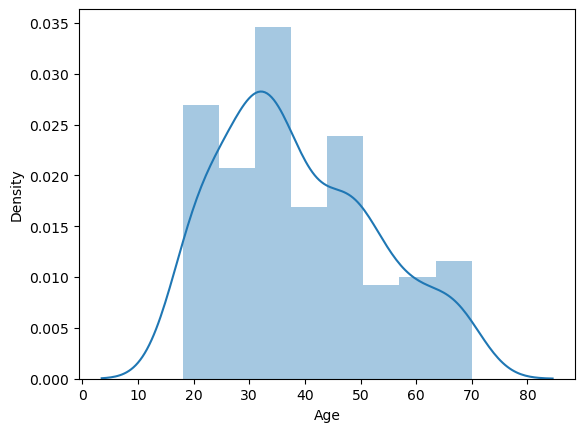

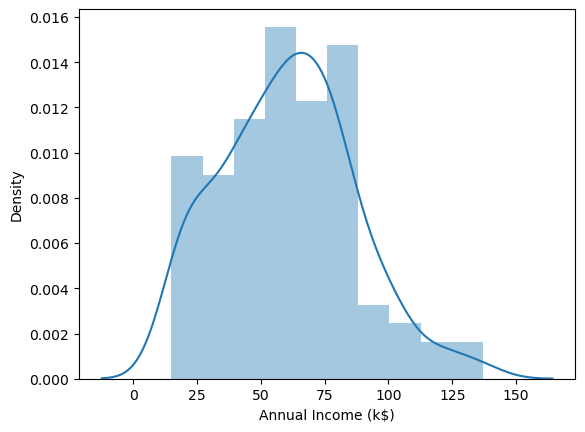

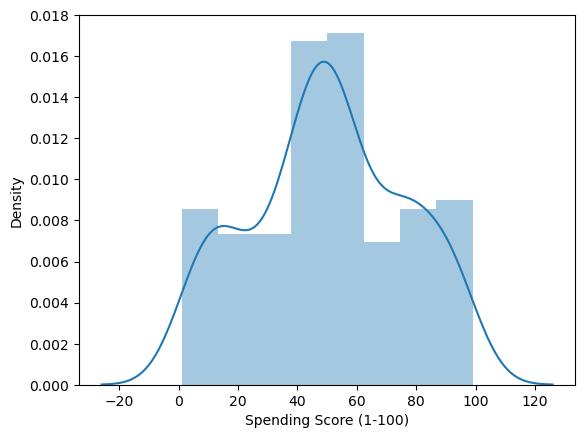

In [15]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

This visualization helps in identifying patterns like skewness, multimodality, and the range of the values for each numerical column.
Useful for spotting outliers or unusual distributions.

Next plot combines a histogram and a kernel density estimate (KDE) to provide insights into the shape of the data.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

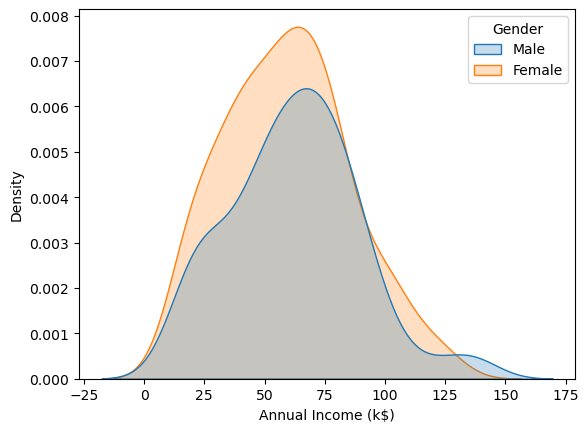

In [18]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)


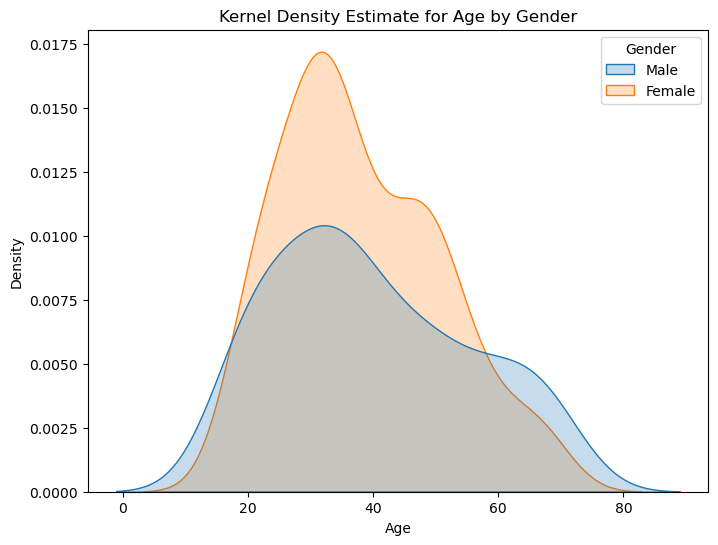

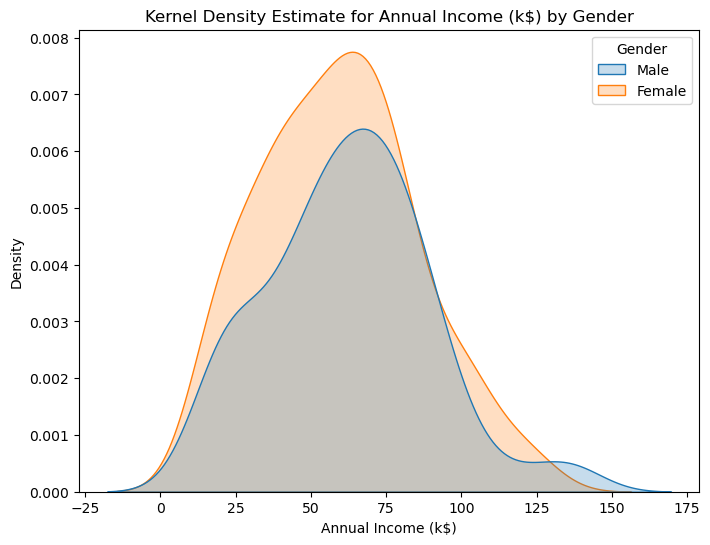

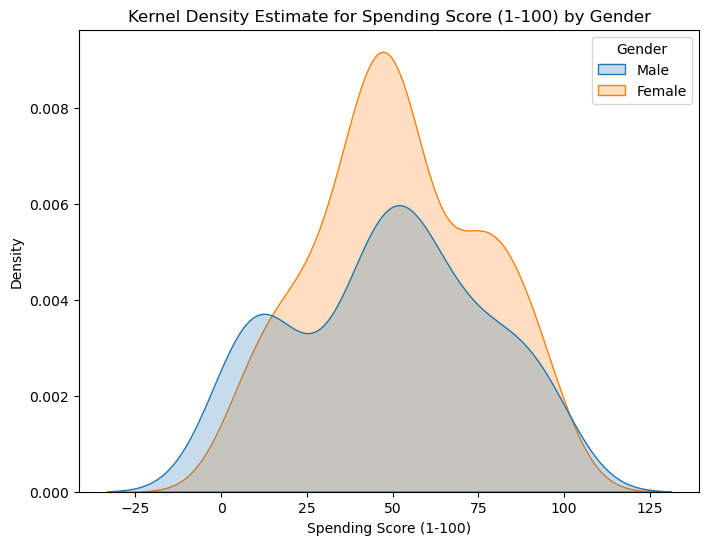

In [20]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True)
    plt.title(f'Kernel Density Estimate for {i} by Gender')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()


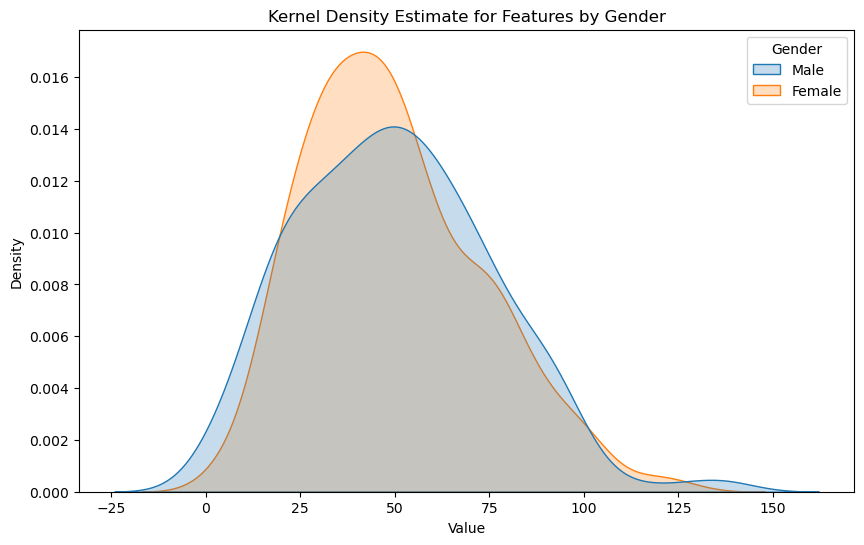

In [22]:
# Melting the dataframe to convert it to long-form
df_melted = df.melt(id_vars=['Gender'], value_vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
                    var_name='Feature', value_name='Value')

# Plotting KDE for each feature with gender as hue
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_melted, x='Value', hue='Gender', shade=True, common_norm=False)
plt.title('Kernel Density Estimate for Features by Gender')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


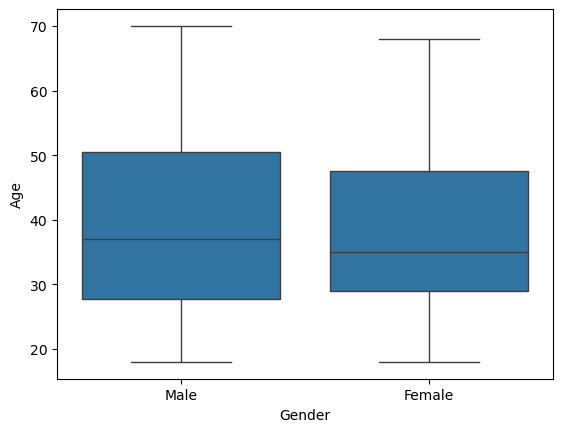

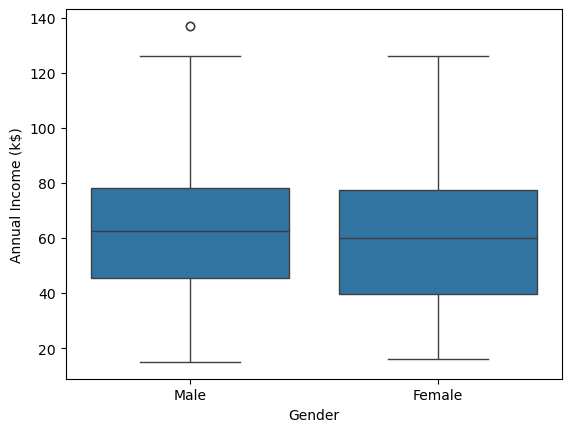

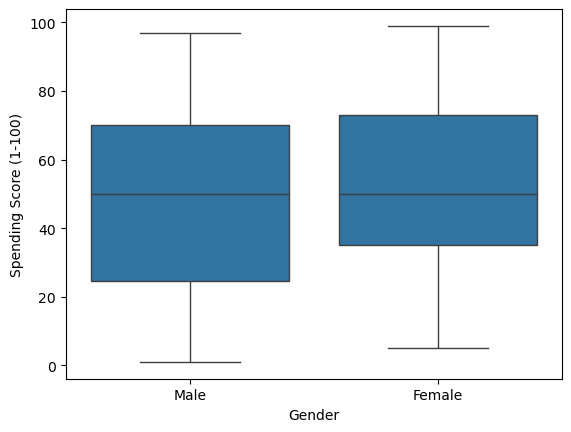

In [24]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

Understanding the gender distribution helps identify demographic trends and ensures fairness when targeting or interpreting clusters during customer segmentation.

In [27]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

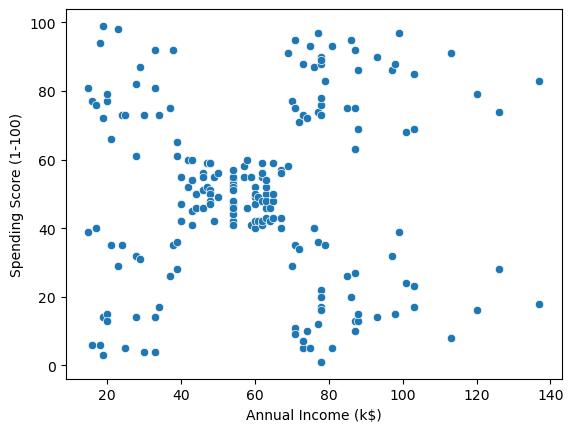

In [29]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

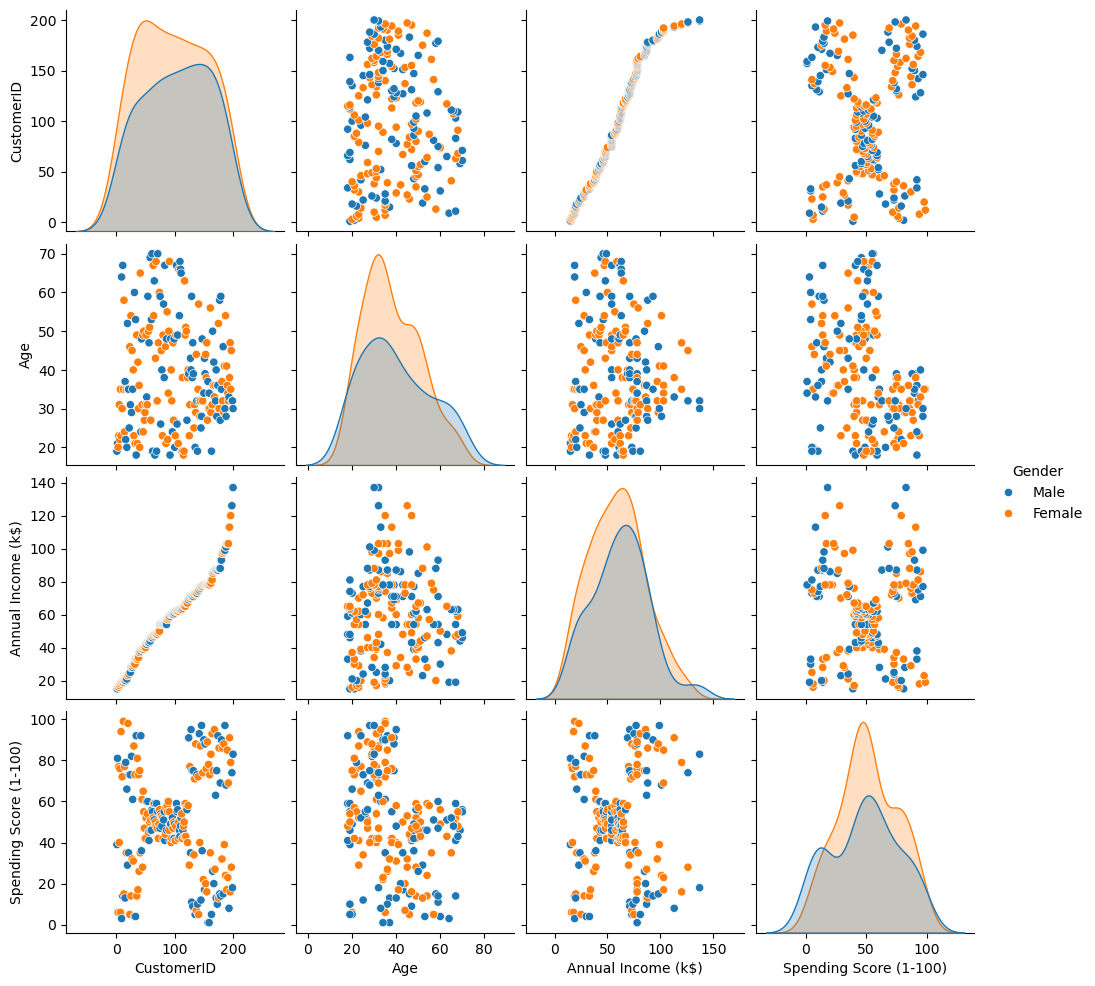

In [31]:
sns.pairplot(df,hue='Gender')

In [33]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [35]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
df_numeric.corr()  


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


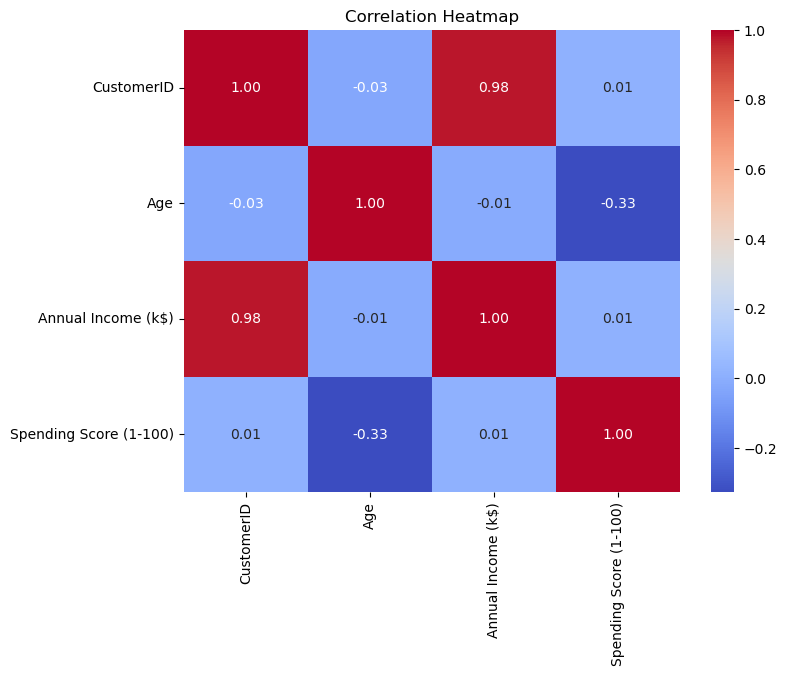

In [37]:
# Selecting only numeric columns 
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation
corr_matrix = df_numeric.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Matrix Interpretation:

1. CustomerID:
   
CustomerID vs Annual Income (k$): 0.977548

This strong positive correlation is expected because CustomerID is sequential and might unintentionally align with income values in this dataset. It should be excluded from clustering or modeling.

Other correlations with CustomerID are near zero, indicating no meaningful relationship with Age or Spending Score.

2. Age:
   
Age vs Spending Score (1-100): -0.327227

A moderate negative correlation suggests that older customers tend to have lower spending scores.

Age vs Annual Income (k$): -0.012398

Near-zero correlation indicates no clear linear relationship between age and income.

3. Annual Income (k$):

Annual Income vs Spending Score (1-100): 0.009903

Almost no correlation, meaning spending score is not linearly related to income. This is an important insight for clustering, as income and spending behavior may follow a non-linear or segmented relationship.

Annual Income vs CustomerID: 0.977548

Again, this strong correlation is likely an artifact of the sequential ID numbers.

4. Spending Score (1-100):

Spending Score vs Age: -0.327227

Indicates younger customers are more likely to have higher spending scores.

Spending Score vs Annual Income: 0.009903

Implies no direct linear relationship between income and spending score, reinforcing the need for clustering to identify patterns.

Key Takeaways:

We can exclude CustomerID from clustering: Its high correlation with Annual Income and sequential nature make it unsuitable for analysis.

Let's focus on Age, Annual Income, and Spending Score for clustering: Age and Spending Score show some meaningful relationships worth exploring further.

The lack of direct correlation between Annual Income and Spending Score suggests other factors (e.g., non-linear patterns) drive spending behavior.

Moderate Negative Correlation (Age vs Spending Score): Suggests younger customers are a key demographic for higher spending scores.

# K-means clustering

K-Means clustering groups data into distinct clusters based on numerical similarity, making it ideal for segmenting customers based on:
- Age: Younger or older customers.
- Annual Income: High, moderate, or low earners.
- Spending Score: High, medium, or low spenders.

The dataset has clear numerical features that lend themselves well to grouping via K-Means.

In [42]:
# Creates an instance of the K-Means algorithm configured to identify 3 clusters.
clustering1 = KMeans(n_clusters=3)

In [44]:
# Fits the K-Means model on the Annual Income (k$) column. This groups customers based solely on their annual income into 3 clusters.
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [46]:
# Returns an array where each value represents the cluster label assigned to a corresponding data point (customer). Labels range from 0 to 2 (since there are 3 clusters).
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Customers are split into three groups:
- Cluster 0: Customers with low annual income (initial entries in the array).
- Cluster 1: Customers with medium annual income.
- Cluster 2: Customers with high annual income (final entries in the array).
  
The transition in labels (from 0 to 1 and then 2) reflects how the clustering algorithm groups customers progressively based on income.

In [49]:
# The new column Income Cluster assigns customers to one of three clusters based on their annual income.
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [51]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
0    86
1    22
Name: count, dtype: int64

Most customers fall into the medium-income category (Cluster 1), followed by low-income (Cluster 0) and high-income (Cluster 2).

In [54]:
clustering1.inertia_

25341.285871863223

Measures the within-cluster sum of squares (WCSS), which indicates how tightly the data points are grouped in each cluster. Lower inertia suggests more compact clusters.

This is the total WCSS for the 3 clusters. The value is relatively high because the clustering is based on only one feature (Annual Income (k$)), and there may still be some overlap among clusters.

In [57]:
intertia_scores=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [59]:
 intertia_scores

[48660.88888888888,
 23528.152173913048,
 15263.149206349208,
 8688.388977879482,
 5483.164890002785,
 3972.3214285714284,
 3491.4163614163613,
 2451.9170940170943,
 1841.4702686202686]

Inertia decreases significantly as you increase the number of clusters from 2 to 5.

After 5 clusters, the decrease becomes slower (i.e., diminishing returns on reducing inertia by adding more clusters).

Based on this pattern, the "elbow" might occur around K=5 or K=6, suggesting that 5 or 6 clusters might be a reasonable choice.

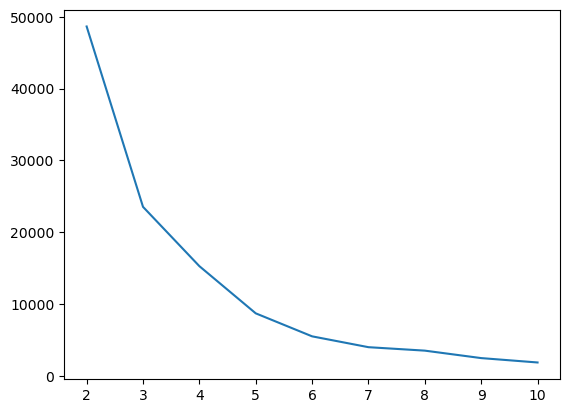

In [62]:
plt.plot(range(2,11),intertia_scores)

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [66]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,40.023256,36.348837,50.081395
1,37.545455,108.181818,52.000000
2,38.065217,71.804348,49.880435


In [68]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


We've used K-means clustering with n_clusters=5, which means the algorithm is trying to group the data into 5 clusters based on Annual Income (k$) and Spending Score (1-100).

After fitting the K-means model, we've assigned the resulting labels (cluster assignments) to the new column Spending and Income Cluster.

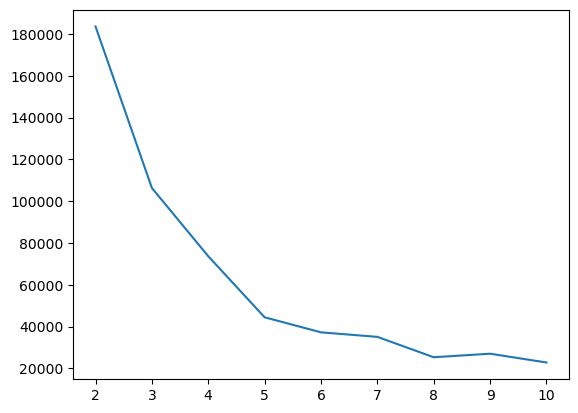

In [71]:
intertia_scores2=[]
for i in range(2,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(2,11),intertia_scores2)

Let's see rsults on the plot

In [74]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

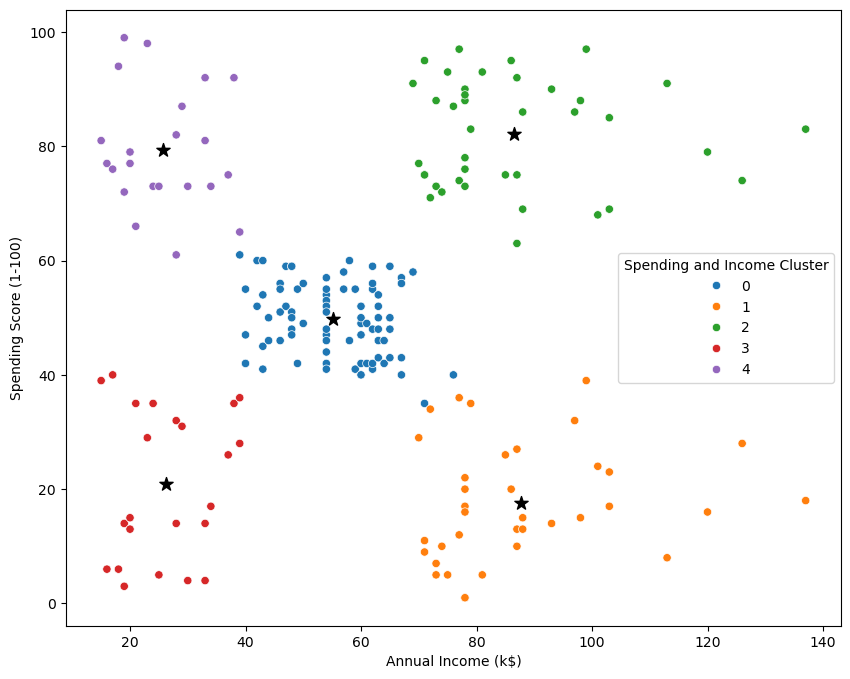

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [78]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


The gender distribution in each cluster varies:

Cluster 0 has a higher proportion of females, while Cluster 1 has a higher proportion of males.

In other clusters, the gender distribution is more balanced, such as in Cluster 3 and Cluster 2.

If we're planning targeted marketing campaigns, these proportions can help us understand the gender preferences in different clusters.

For instance, if Cluster 0 has a higher proportion of Females, a marketing campaign focused on female-oriented products might be more effective for this cluster.

Similarly, Cluster 1 might be more receptive to campaigns targeting Males.

Let's try other combinations.

In [81]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


Let's standardize our data. StandardScaler is used to standardize the data. This means each feature (column) will have a mean of 0 and a standard deviation of 1. This is typically done when working with machine learning algorithms that are sensitive to the scale of the data (e.g., K-means, PCA).

In [84]:
from sklearn.preprocessing import StandardScaler

In [86]:
scale = StandardScaler()

In [88]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [90]:
 dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,3,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,3,False


In [92]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [94]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [96]:
dff = scale.fit_transform(dff)

In [98]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


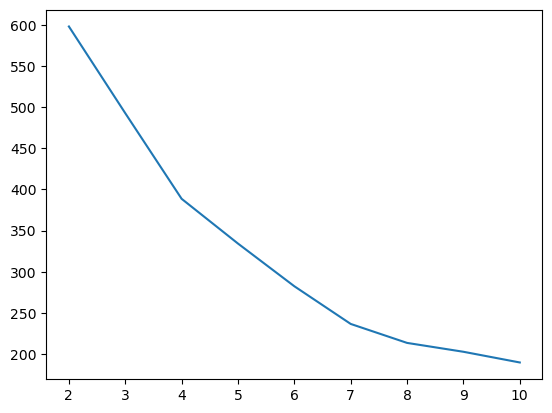

In [100]:
intertia_scores3=[]
for i in range(2,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(2,11),intertia_scores3)

In [102]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


Finally, we are going to recommend cluster 4 for our marketing spend because it has high income and high spending score customers. We also need to stress our attention to cluster 2 and see each one of those customers ids. In addition, we could create a robust marketing campaign for these two clusters that we have determined. 

In [105]:
df.to_csv('Clustering.csv')